# Prediciting California Housing Prices Machine Learning

## **Chapter 1: Data Exploration, Visualization, Cleaning and Correlations**

**Introduction:**  
Begin your analysis by familiarizing yourself with the dataset. This initial exploration helps in understanding the data's structure and characteristics, setting the stage for more detailed analysis.

**1.1 Loading the Dataset**  
- Import the dataset and review the initial rows to grasp its basic structure.


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [76]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('housing.csv')

# Display the first few rows of the DataFrame to check the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The data consists of the following attributes, as described by Kaggle (source: [Kaggle California Housing Prices Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)):

1. **Longitude:** Indicates how far west a house is located; higher values represent positions farther west.
2. **Latitude:** Indicates how far north a house is located; higher values represent positions farther north.
3. **Housing Median Age:** The median age of houses within a block; lower values indicate newer buildings.
4. **Total Rooms:** The total number of rooms within a block.
5. **Total Bedrooms:** The total number of bedrooms within a block.
6. **Population:** The total number of people residing within a block.
7. **Households:** The total number of households (groups of people residing in a single housing unit) within a block.
8. **Median Income:** The median income of households within a block, measured in tens of thousands of US dollars.
9. **Median House Value:** The median value of houses within a block, measured in US dollars.
10. **Ocean Proximity:** The location of the house relative to the ocean or sea.

In [77]:
#Get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
#Get the columns of the data
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [79]:
#Check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [80]:
#Drop the missing values
df.dropna(inplace=True)

In [81]:
#check the shape of the data
df.shape


(20433, 10)

In [82]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

**1.2 Statistical Overview**  
- Analyze key statistical metrics such as mean, median, standard deviation, etc., to summarize the data.


In [83]:
#Show the statistics of the data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [84]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

**1.3 Data Visualization**  
- Utilize visual tools like scatter plots, histograms, and box plots to gain insights and identify patterns in the data.


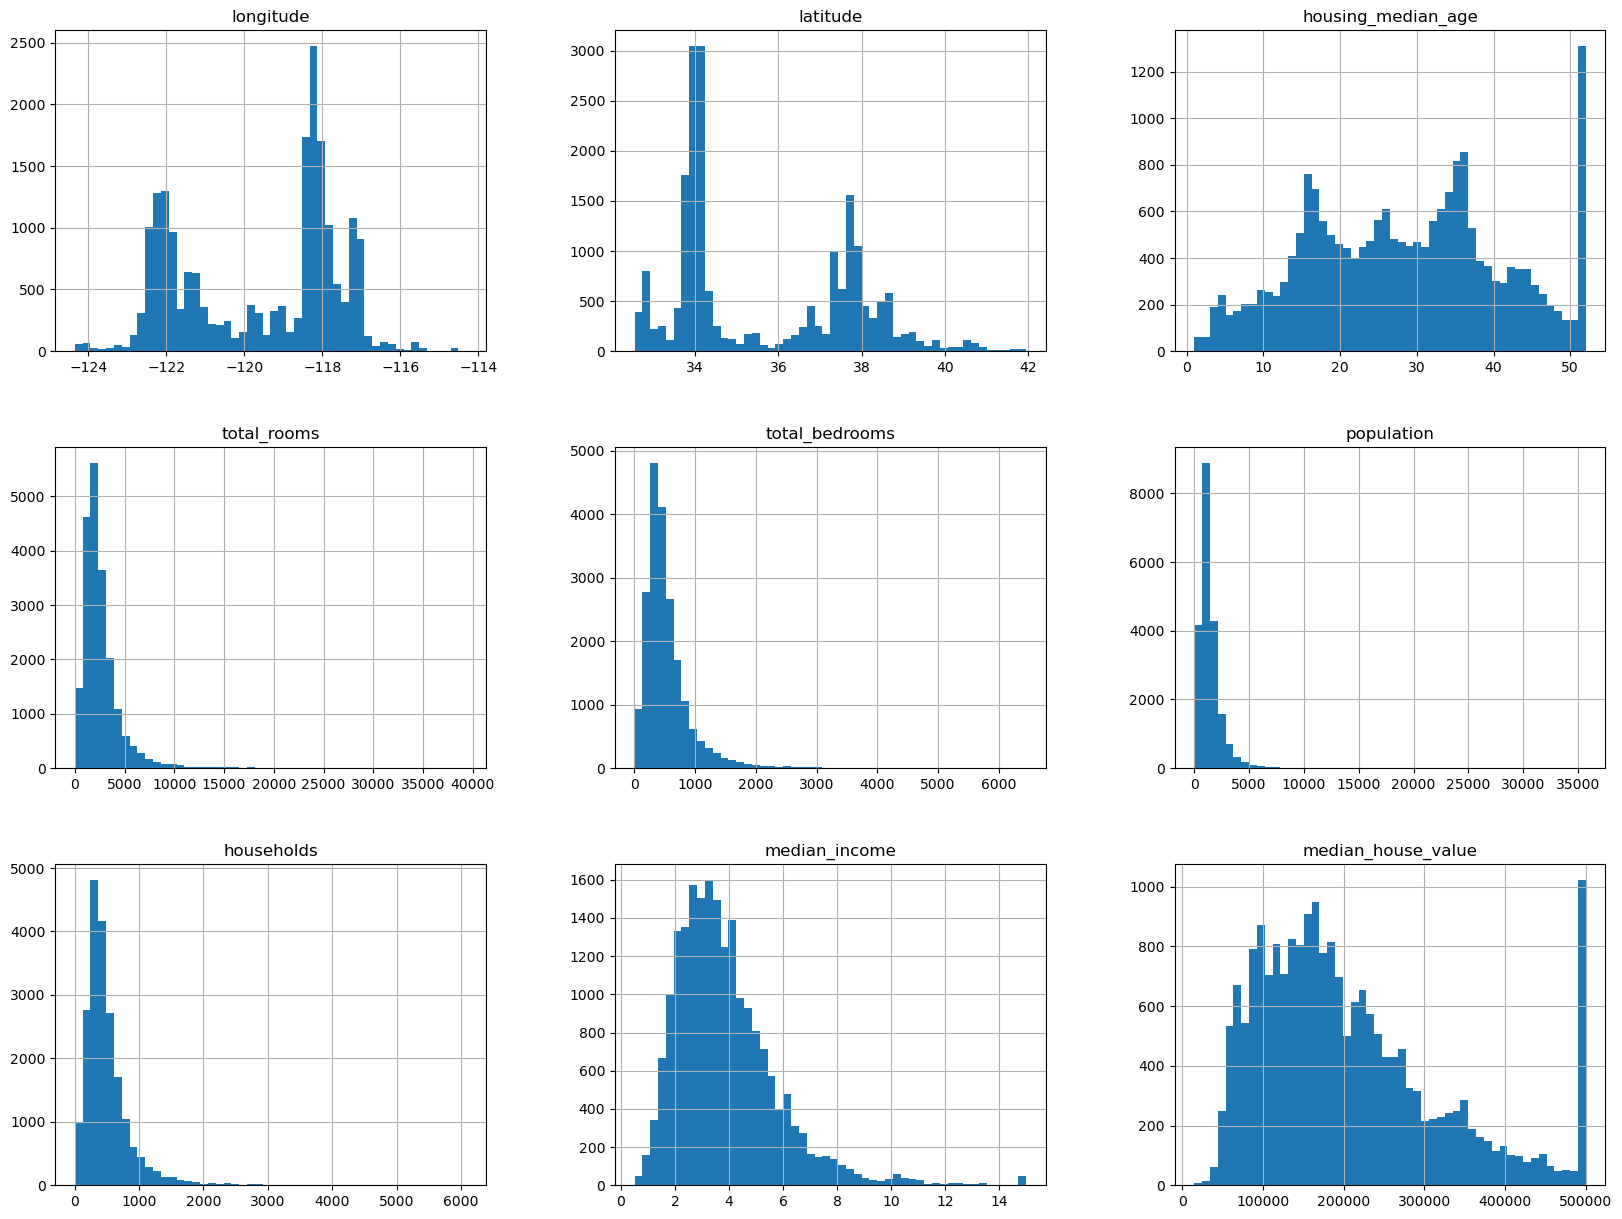

In [86]:
#Plot the histogram of the data by ocean proximity and avg house value
df.hist(bins=50, figsize=(20,15))
plt.show()


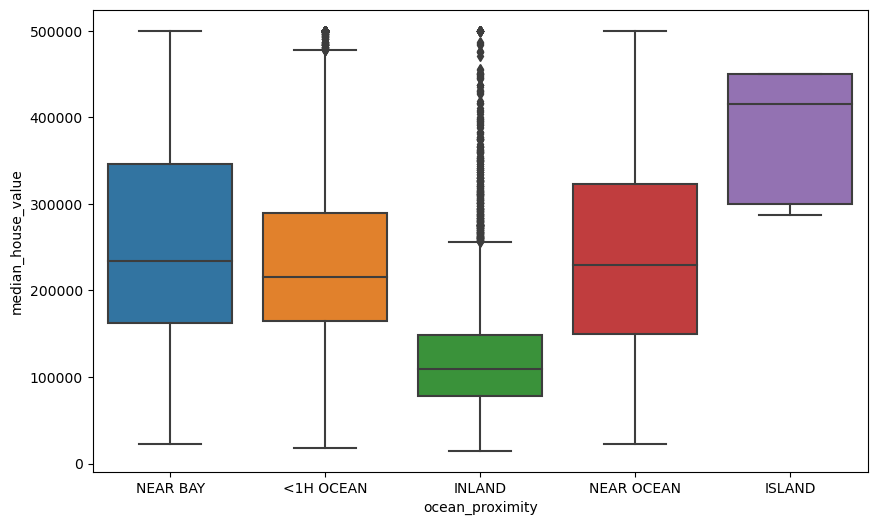

In [87]:
#plot to show the ocean proximity impact on the average house value
plt.figure(figsize=(10,6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.show()


C:\Users\Legion 5\AppData\Local\Temp\ipykernel_24408\2880257539.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


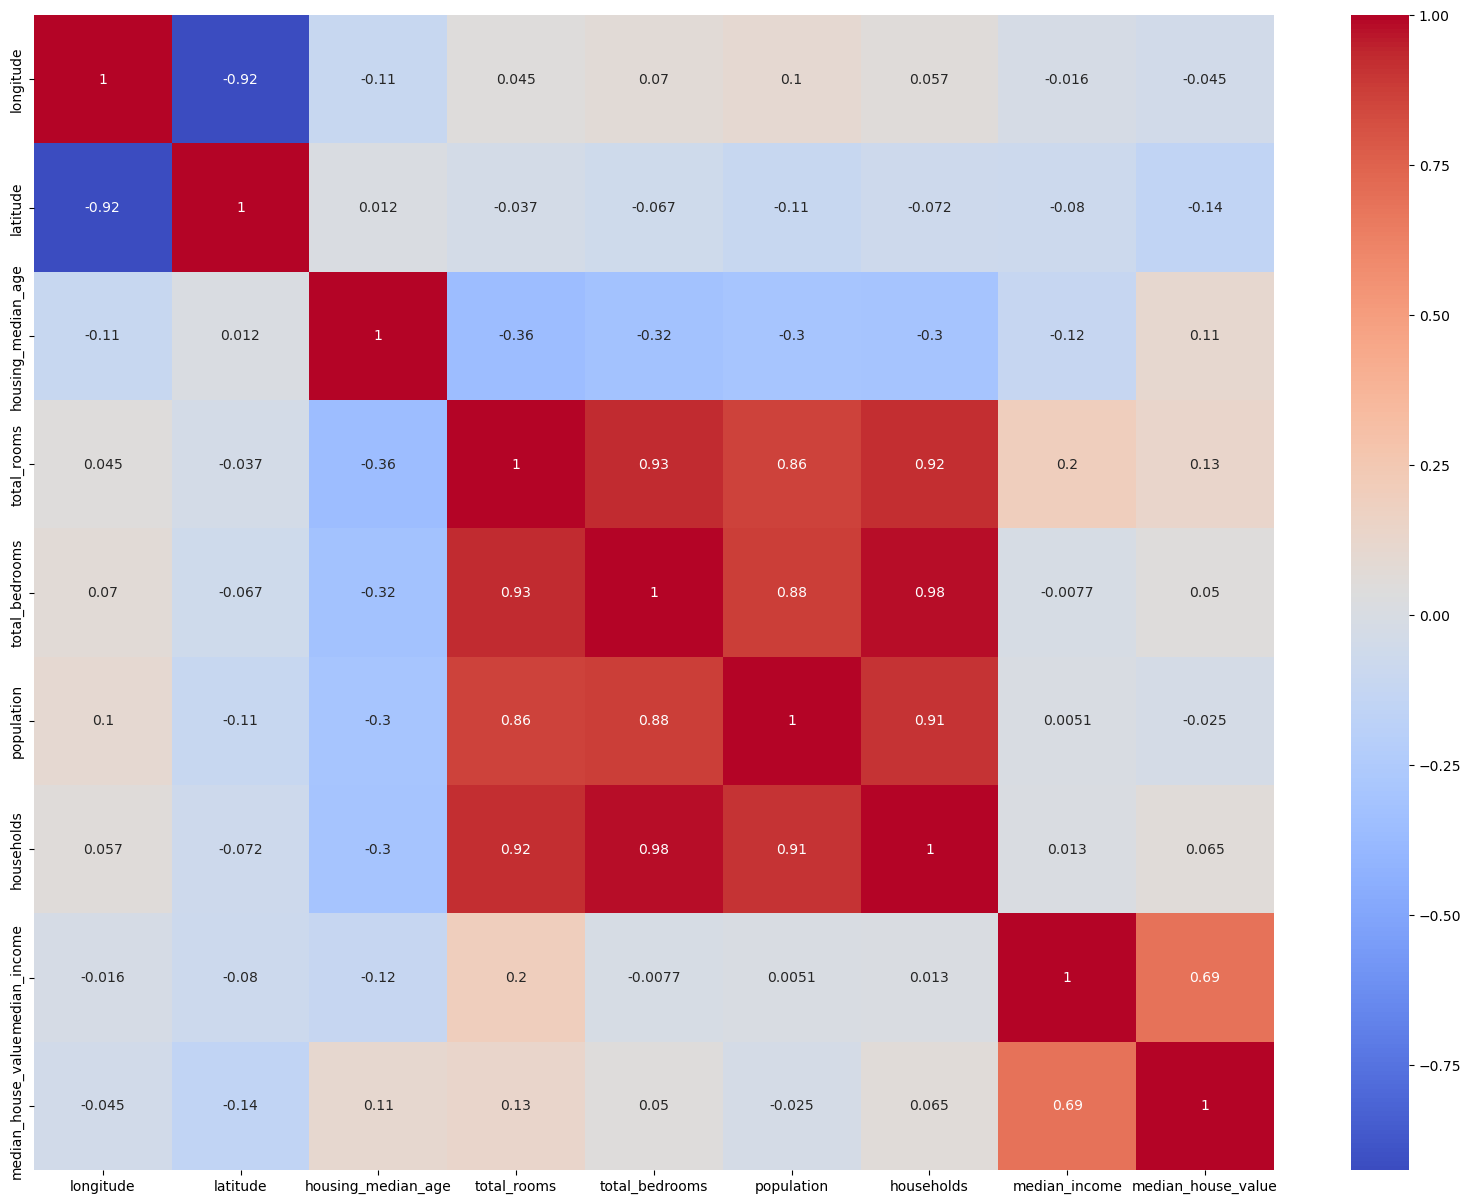

In [88]:
#Plot correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [89]:
# Shuffle the rows of the DataFrame df while keeping the index intact.
df_shuffled = df.sample(n=len(df), random_state=1)
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,<1H OCEAN
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,NEAR OCEAN
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,190300.0,<1H OCEAN
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,125800.0,NEAR OCEAN
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,500001.0,<1H OCEAN
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,91200.0,INLAND


The code `df_shuffled = df.sample(n=len(df), random_state=1)` does the following:

1. **`df`**: This is the name of a DataFrame in Pandas (a Python library for data analysis). `df` contains a table of data.

2. **`sample()`**: This is a Pandas method used to randomly select rows (samples) from a DataFrame. It has several parameters:
   - **`n=len(df)`**: This specifies that the number of rows to be randomly selected is equal to the total number of rows in the DataFrame `df`. In other words, you're sampling the entire DataFrame.
   - **`random_state=1`**: This parameter ensures that the random selection is reproducible. Setting `random_state` to a specific value (e.g., `1`) ensures that you get the same shuffled result every time the code is run, making the process predictable for debugging or analysis purposes.

3. **The result**: 
   - The DataFrame `df_shuffled` is a new version of `df`, where the rows have been randomly shuffled, but it still contains all the rows from the original DataFrame. The number of rows remains the same, but their order has changed.

In summary, this code takes the DataFrame `df`, shuffles its rows in a random order, and stores the result in `df_shuffled`. The `random_state=1` ensures that the shuffling is consistent across multiple executions.

## **Chapter 2: Feature Engineering**

**Introduction:**  
Enhance your dataset by creating new features and scaling existing ones. Effective feature engineering can significantly improve model performance.


In [90]:
# Convert the 'ocean_proximity' column of the shuffled DataFrame into one-hot encoded variables.
# Each unique value in the 'ocean_proximity' column will be transformed into a new binary column.
# The first 5 rows of the resulting DataFrame are displayed using the 'head()' method.
pd.get_dummies(df_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6715,1,0,0,0,0
4121,1,0,0,0,0
15433,1,0,0,0,0
20272,0,0,0,0,1
11843,0,1,0,0,0


In [91]:
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,<1H OCEAN
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,NEAR OCEAN
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,190300.0,<1H OCEAN
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,125800.0,NEAR OCEAN
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,500001.0,<1H OCEAN
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,91200.0,INLAND


In [92]:
# Drops the 'ocean_proximity' column from the DataFrame 'df_shuffled'
# 'axis=1' specifies that a column is being dropped (axis=0 would refer to rows)
# .head() returns the first 5 rows of the modified DataFrame (without 'ocean_proximity')
df_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0


In [93]:
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,<1H OCEAN
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,NEAR OCEAN
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,190300.0,<1H OCEAN
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,125800.0,NEAR OCEAN
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,500001.0,<1H OCEAN
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,91200.0,INLAND


In [94]:
# Drops the 'ocean_proximity' column from 'df_shuffled' 
#  (removing it so it can be replaced by dummy variables)
# Uses 'pd.get_dummies()' to convert the 'ocean_proximity' column into one-hot encoded columns
# This creates a separate binary column for each unique category in 'ocean_proximity'
# Concatenates (combines) the resulting DataFrame without 'ocean_proximity' and the one-hot encoded columns
# 'axis=1' ensures the concatenation is along the columns (adding new columns to the DataFrame)
# The 'df_final.head()' function shows the first 5 rows of the newly combined DataFrame
df_final= pd.concat([df_shuffled.drop('ocean_proximity', axis=1),
                     pd.get_dummies(df_shuffled['ocean_proximity'])], axis=1)
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,1,0,0,0,0
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,1,0,0,0,0
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,1,0,0,0,0
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,0,0,0,0,1
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,0,1,0,0,0


In [95]:
# Reorders the columns of 'df_final' by specifying the desired column order
# Keeps only the listed columns:
#    - 'longitude', 'latitude': geographical coordinates
#    - 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households': housing data
#    - 'median_income': median income of the area
#    - One-hot encoded columns: '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN' 
#      (representing different proximity categories to water)
#    - 'median_house_value': target variable or outcome of interest
# The DataFrame is then updated with only these columns in the specified order.
# The call to 'df_final' at the end outputs the updated DataFrame.

df_final = df_final[['longitude', 'latitude', 
                     'housing_median_age', 'total_rooms', 
                     'total_bedrooms', 'population', 
                     'households', 'median_income', 
                     '<1H OCEAN', 'INLAND', 'ISLAND', 
                     'NEAR BAY', 'NEAR OCEAN', 'median_house_value']]
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,1,0,0,0,0,360900.0
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,1,0,0,0,0,291500.0
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,1,0,0,0,0,131300.0
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,0,0,0,0,1,500001.0
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,0,1,0,0,0,118800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,1,0,0,0,0,190300.0
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,0,0,0,0,1,125800.0
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,1,0,0,0,0,500001.0
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,0,1,0,0,0,91200.0


## **Chapter 5: Model Building**

**Introduction:**  
In this phase, you'll build and train various models to find the best fit for your data. This involves splitting the data, training models, and evaluating their performance.


In [96]:
# Splits 'df_final' into training (first 18,000 rows), test (next 1,217 rows), and validation sets (remaining rows).
# Returns the length of each subset to verify the split.
train_pd, test_pd, val_pd = df_final[:18000], df_final[18000:19217], df_final[19217:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1216)

In [97]:
# Splits 'train_pd' into features (X_train: all columns except the last) and target (y_train: last column).
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]

In [98]:
# Convert validation DataFrame to NumPy array and separate into features (all columns except the last) and target labels (last column)
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]

# Convert test DataFrame to NumPy array and separate into features (all columns except the last) and target labels (last column)
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]


In [99]:
# Print the shapes of training, validation, and test datasets for features and target labels
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1216, 13), (1216,), (1217, 13), (1217,))

In [100]:
# scaler= StandardScaler().fit(X_train[:, :8])

# def preprocessor(X):
#     A = np.copy (X)
#     A[:, :8] = scaler.transform(A[:, :8])
#     return A

# X_train_preprocessed = preprocessor(X_train)
# X_train_preprocessed

In [101]:
# pd.DataFrame(X_train_preprocessed).head

In [102]:
# pd.DataFrame(X_train_preprocessed).hist()

In [103]:
# pd.DataFrame(X_train_preprocessed)[0].hist()
# pd.DataFrame(X_train_preprocessed)[1].hist()

In [104]:
# Initialize and fit the StandardScaler on the first 8 features of the training set
scaler = StandardScaler().fit(X_train[:, :8])

# Define a preprocessing function that scales the first 8 features of the input data using the fitted scaler
def preprocessor(X):
    A = np.copy(X)  # Create a copy of the input data to avoid modifying the original
    A[:, :8] = scaler.transform(A[:, :8])  # Apply scaling to the first 8 features
    return A  # Return the scaled data

# Apply the preprocessor function to the training, validation, and test datasets
X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)


In [105]:
# Print the shapes of the training, validation, and test feature arrays after preprocessing
X_train.shape, X_val.shape, X_test.shape


((18000, 13), (1216, 13), (1217, 13))

In [107]:
# Import the mean_squared_error function from scikit-learn and alias it as mse
from sklearn.metrics import mean_squared_error as mse

# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Initialize and fit a Linear Regression model on the training data
lm = LinearRegression().fit(X_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the training and validation datasets
# RMSE is calculated by predicting on the training and validation sets and comparing with the true labels
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)


(68533.98851290451, 68917.89298998918)

In [129]:
# Import the KNeighborsRegressor class from scikit-learn
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit a K-Nearest Neighbors regressor with 10 neighbors on the training data
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the training and validation datasets
# RMSE is computed by predicting on the training and validation sets and comparing the predictions with the true labels
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)


(53711.83586198198, 60475.17825546932)

In [130]:
# Import the RandomForestRegressor class from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit a Random Forest regressor with a maximum tree depth of 9 on the training data
rfr = RandomForestRegressor(max_depth=9).fit(X_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the training and validation datasets
# RMSE is calculated by predicting on the training and validation sets and comparing the predictions with the true labels
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)


(48252.79936844114, 55309.27985705033)

In [132]:
# Import the GradientBoostingRegressor class from scikit-learn
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit a Gradient Boosting regressor with 200 estimators on the training data
gbr = GradientBoostingRegressor(n_estimators=200).fit(X_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the training and validation datasets
# RMSE is computed by predicting on the training and validation sets and comparing the predictions with the true labels
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)


(48234.844661436364, 52501.41443352248)

In [141]:
# Import necessary modules from TensorFlow and Keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

# Initialize a Sequential neural network model
simple_nn = Sequential()

# Add an input layer specifying the input shape (13 features)
simple_nn.add(InputLayer((13,)))

# Add a dense hidden layer with 2 units and ReLU activation function
simple_nn.add(Dense(2, 'relu'))

# Add an output layer with 1 unit and linear activation function for regression
simple_nn.add(Dense(1, 'linear'))

# Initialize the Adam optimizer with a learning rate of 0.1
opt = Adam(learning_rate=0.1)

# Set up a ModelCheckpoint callback to save the best model during training
cp = ModelCheckpoint('model/simple_nn', save_best_only=True)

# Compile the model with mean squared error loss, Adam optimizer, and Root Mean Squared Error as a metric
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

# Train the model on the training data, with validation data and ModelCheckpoint callback
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)


Epoch 1/100
532/563 [===========================>..] - ETA: 0s - loss: 53823348736.0000 - root_mean_squared_error: 231998.5938INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 53444116480.0000 - root_mean_squared_error: 231179.8281 - val_loss: 43026169856.0000 - val_root_mean_squared_error: 207427.5000
Epoch 2/100
545/563 [============================>.] - ETA: 0s - loss: 40326774784.0000 - root_mean_squared_error: 200815.2812INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 39940653056.0000 - root_mean_squared_error: 199851.5781 - val_loss: 29219760128.0000 - val_root_mean_squared_error: 170937.8906
Epoch 3/100
544/563 [===========================>..] - ETA: 0s - loss: 27291084800.0000 - root_mean_squared_error: 165200.1406INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 27161894912.0000 - root_mean_squared_error: 164808.6562 - val_loss: 21278652416.0000 - val_root_mean_squared_error: 145872.0469
Epoch 4/100
538/563 [===========================>..] - ETA: 0s - loss: 19771060224.0000 - root_mean_squared_error: 140609.6094INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 19678994432.0000 - root_mean_squared_error: 140281.8438 - val_loss: 15586051072.0000 - val_root_mean_squared_error: 124844.1094
Epoch 5/100
546/563 [============================>.] - ETA: 0s - loss: 12672452608.0000 - root_mean_squared_error: 112571.9922INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 12540364800.0000 - root_mean_squared_error: 111983.7734 - val_loss: 8408854528.0000 - val_root_mean_squared_error: 91699.8047
Epoch 6/100
528/563 [===========================>..] - ETA: 0s - loss: 6425246208.0000 - root_mean_squared_error: 80157.6328INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 6371031552.0000 - root_mean_squared_error: 79818.7422 - val_loss: 5074432000.0000 - val_root_mean_squared_error: 71235.0469
Epoch 7/100
545/563 [============================>.] - ETA: 0s - loss: 5145430016.0000 - root_mean_squared_error: 71731.6562INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 5127269888.0000 - root_mean_squared_error: 71604.9609 - val_loss: 4900275712.0000 - val_root_mean_squared_error: 70001.9688
Epoch 8/100
560/563 [============================>.] - ETA: 0s - loss: 4959399936.0000 - root_mean_squared_error: 70423.0078INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4956894720.0000 - root_mean_squared_error: 70405.2188 - val_loss: 4812503040.0000 - val_root_mean_squared_error: 69372.2031
Epoch 9/100
529/563 [===========================>..] - ETA: 0s - loss: 4870375936.0000 - root_mean_squared_error: 69788.0781INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4870012416.0000 - root_mean_squared_error: 69785.4766 - val_loss: 4774068736.0000 - val_root_mean_squared_error: 69094.6328
Epoch 10/100
554/563 [============================>.] - ETA: 0s - loss: 4820625920.0000 - root_mean_squared_error: 69430.7266INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4815385600.0000 - root_mean_squared_error: 69392.9766 - val_loss: 4733513216.0000 - val_root_mean_squared_error: 68800.5312
Epoch 11/100
549/563 [============================>.] - ETA: 0s - loss: 4778366464.0000 - root_mean_squared_error: 69125.7266INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4776014848.0000 - root_mean_squared_error: 69108.7188 - val_loss: 4702334976.0000 - val_root_mean_squared_error: 68573.5703
Epoch 12/100
548/563 [============================>.] - ETA: 0s - loss: 4748193792.0000 - root_mean_squared_error: 68907.1406INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4748078592.0000 - root_mean_squared_error: 68906.3047 - val_loss: 4702334464.0000 - val_root_mean_squared_error: 68573.5703
Epoch 13/100
547/563 [============================>.] - ETA: 0s - loss: 4740846592.0000 - root_mean_squared_error: 68853.8047INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4727510528.0000 - root_mean_squared_error: 68756.8906 - val_loss: 4690500608.0000 - val_root_mean_squared_error: 68487.2266
Epoch 14/100
563/563 [==============================] - 1s 1ms/step - loss: 4710153216.0000 - root_mean_squared_error: 68630.5547 - val_loss: 4699519488.0000 - val_root_mean_squared_error: 68553.0391
Epoch 15/100
558/563 [============================>.] - ETA: 0s - loss: 4690851328.0000 - root_mean_squared_error: 68489.7891INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4699877376.0000 - root_mean_squared_error: 68555.6484 - val_loss: 4682365440.0000 - val_root_mean_squared_error: 68427.8125
Epoch 16/100
528/563 [===========================>..] - ETA: 0s - loss: 4668015104.0000 - root_mean_squared_error: 68322.8750INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4687985664.0000 - root_mean_squared_error: 68468.8672 - val_loss: 4676049920.0000 - val_root_mean_squared_error: 68381.6484
Epoch 17/100
533/563 [===========================>..] - ETA: 0s - loss: 4686637568.0000 - root_mean_squared_error: 68459.0234INFO:tensorflow:Assets written to: model\simple_nn\assets


INFO:tensorflow:Assets written to: model\simple_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4680020992.0000 - root_mean_squared_error: 68410.6797 - val_loss: 4671067648.0000 - val_root_mean_squared_error: 68345.2109
Epoch 18/100
563/563 [==============================] - 1s 1ms/step - loss: 4673215488.0000 - root_mean_squared_error: 68360.9219 - val_loss: 4695379968.0000 - val_root_mean_squared_error: 68522.8438
Epoch 19/100
563/563 [==============================] - 1s 1ms/step - loss: 4668314624.0000 - root_mean_squared_error: 68325.0625 - val_loss: 4690597376.0000 - val_root_mean_squared_error: 68487.9375
Epoch 20/100
563/563 [==============================] - 1s 1ms/step - loss: 4663596544.0000 - root_mean_squared_error: 68290.5312 - val_loss: 4710884864.0000 - val_root_mean_squared_error: 68635.8828
Epoch 21/100
563/563 [==============================] - 1s 1ms/step - loss: 4660552192.0000 - root_mean_squared_error: 68268.2344 - val_loss: 4699471360.0000 - val_root_mean_squared_error: 68552.6875
Epoch 22/100


In [142]:
# Import the load_model function from Keras to load a saved model
from keras.models import load_model

# Load the previously saved model from the specified file path
simple_nn = load_model('model/simple_nn')

# Calculate the Root Mean Squared Error (RMSE) for the training and validation datasets
# RMSE is computed by predicting with the loaded model on the training and validation sets, and comparing the predictions with the true labels
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)


38/38 [==============================] - 0s 1ms/step


(68366.42514682867, 68345.21223610015)

In [143]:
# Initialize a Sequential neural network model with more complexity
medium_nn = Sequential()

# Add an input layer specifying the input shape (13 features)
medium_nn.add(InputLayer((13,)))

# Add a dense hidden layer with 32 units and ReLU activation function
medium_nn.add(Dense(32, 'relu'))

# Add another dense hidden layer with 16 units and ReLU activation function
medium_nn.add(Dense(16, 'relu'))

# Add an output layer with 1 unit and linear activation function for regression
medium_nn.add(Dense(1, 'linear'))

# Initialize the Adam optimizer with a learning rate of 0.1
opt = Adam(learning_rate=0.1)

# Set up a ModelCheckpoint callback to save the best model during training
cp = ModelCheckpoint('model/medium_nn', save_best_only=True)

# Compile the model with mean squared error loss, Adam optimizer, and Root Mean Squared Error as a metric
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

# Train the model on the training data, with validation data and ModelCheckpoint callback
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)


Epoch 1/100
541/563 [===========================>..] - ETA: 0s - loss: 8535204352.0000 - root_mean_squared_error: 92386.1719INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 8384598016.0000 - root_mean_squared_error: 91567.4531 - val_loss: 4629030400.0000 - val_root_mean_squared_error: 68036.9766
Epoch 2/100
540/563 [===========================>..] - ETA: 0s - loss: 4425634304.0000 - root_mean_squared_error: 66525.4375INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 3ms/step - loss: 4436937728.0000 - root_mean_squared_error: 66610.3438 - val_loss: 4626989056.0000 - val_root_mean_squared_error: 68021.9766
Epoch 3/100
533/563 [===========================>..] - ETA: 0s - loss: 4349052416.0000 - root_mean_squared_error: 65947.3438INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4346307072.0000 - root_mean_squared_error: 65926.5312 - val_loss: 4547468288.0000 - val_root_mean_squared_error: 67434.9219
Epoch 4/100
539/563 [===========================>..] - ETA: 0s - loss: 4277454592.0000 - root_mean_squared_error: 65402.2539INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4281216000.0000 - root_mean_squared_error: 65431.0000 - val_loss: 4382600704.0000 - val_root_mean_squared_error: 66201.2109
Epoch 5/100
549/563 [============================>.] - ETA: 0s - loss: 4236619520.0000 - root_mean_squared_error: 65089.3203INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 4228617216.0000 - root_mean_squared_error: 65027.8203 - val_loss: 4215495936.0000 - val_root_mean_squared_error: 64926.8516
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 4204321024.0000 - root_mean_squared_error: 64840.7344 - val_loss: 4308860416.0000 - val_root_mean_squared_error: 65641.9141
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 4148977920.0000 - root_mean_squared_error: 64412.5586 - val_loss: 4383579648.0000 - val_root_mean_squared_error: 66208.6094
Epoch 8/100
548/563 [============================>.] - ETA: 0s - loss: 4139771904.0000 - root_mean_squared_error: 64341.0586INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4150510336.0000 - root_mean_squared_error: 64424.4531 - val_loss: 4176302848.0000 - val_root_mean_squared_error: 64624.3203
Epoch 9/100
563/563 [==============================] - 1s 1ms/step - loss: 4082018816.0000 - root_mean_squared_error: 63890.6797 - val_loss: 4507303936.0000 - val_root_mean_squared_error: 67136.4609
Epoch 10/100
563/563 [==============================] - 1s 1ms/step - loss: 4088144384.0000 - root_mean_squared_error: 63938.5977 - val_loss: 4356688896.0000 - val_root_mean_squared_error: 66005.2188
Epoch 11/100
533/563 [===========================>..] - ETA: 0s - loss: 4054616576.0000 - root_mean_squared_error: 63675.8711INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4085875200.0000 - root_mean_squared_error: 63920.8516 - val_loss: 4077525248.0000 - val_root_mean_squared_error: 63855.5039
Epoch 12/100
563/563 [==============================] - 1s 2ms/step - loss: 4067824640.0000 - root_mean_squared_error: 63779.5000 - val_loss: 4273567744.0000 - val_root_mean_squared_error: 65372.5312
Epoch 13/100
563/563 [==============================] - 1s 2ms/step - loss: 4055119872.0000 - root_mean_squared_error: 63679.8242 - val_loss: 4196140800.0000 - val_root_mean_squared_error: 64777.6250
Epoch 14/100
563/563 [==============================] - 1s 2ms/step - loss: 4044735488.0000 - root_mean_squared_error: 63598.2344 - val_loss: 4092208896.0000 - val_root_mean_squared_error: 63970.3750
Epoch 15/100
563/563 [==============================] - 1s 1ms/step - loss: 4043424512.0000 - root_mean_squared_error: 63587.9258 - val_loss: 4273004544.0000 - val_root_mean_squared_error: 65368.2227
Epoch 16/100


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4068424192.0000 - root_mean_squared_error: 63784.1992 - val_loss: 4051517952.0000 - val_root_mean_squared_error: 63651.5352
Epoch 19/100
563/563 [==============================] - 1s 1ms/step - loss: 4027416320.0000 - root_mean_squared_error: 63461.9297 - val_loss: 4256027392.0000 - val_root_mean_squared_error: 65238.2344
Epoch 20/100
563/563 [==============================] - 1s 1ms/step - loss: 3977448192.0000 - root_mean_squared_error: 63067.0117 - val_loss: 4615407104.0000 - val_root_mean_squared_error: 67936.7891
Epoch 21/100
563/563 [==============================] - 1s 1ms/step - loss: 3949278720.0000 - root_mean_squared_error: 62843.2852 - val_loss: 4242370304.0000 - val_root_mean_squared_error: 65133.4805
Epoch 22/100
541/563 [===========================>..] - ETA: 0s - loss: 3869771264.0000 - root_mean_squared_error: 62207.4844INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3870524160.0000 - root_mean_squared_error: 62213.5352 - val_loss: 4041085952.0000 - val_root_mean_squared_error: 63569.5352
Epoch 23/100
538/563 [===========================>..] - ETA: 0s - loss: 3842349312.0000 - root_mean_squared_error: 61986.6875INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 3832869888.0000 - root_mean_squared_error: 61910.1758 - val_loss: 3855822592.0000 - val_root_mean_squared_error: 62095.2695
Epoch 24/100
563/563 [==============================] - 1s 1ms/step - loss: 3805505792.0000 - root_mean_squared_error: 61688.7812 - val_loss: 3889067008.0000 - val_root_mean_squared_error: 62362.3828
Epoch 25/100
563/563 [==============================] - 1s 1ms/step - loss: 3811920896.0000 - root_mean_squared_error: 61740.7539 - val_loss: 3921535488.0000 - val_root_mean_squared_error: 62622.1641
Epoch 26/100
551/563 [============================>.] - ETA: 0s - loss: 3781317888.0000 - root_mean_squared_error: 61492.4219INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 3776600832.0000 - root_mean_squared_error: 61454.0547 - val_loss: 3764706816.0000 - val_root_mean_squared_error: 61357.2070
Epoch 27/100
563/563 [==============================] - 1s 1ms/step - loss: 3760771584.0000 - root_mean_squared_error: 61325.1289 - val_loss: 3861570304.0000 - val_root_mean_squared_error: 62141.5352
Epoch 28/100
563/563 [==============================] - 1s 1ms/step - loss: 3753372928.0000 - root_mean_squared_error: 61264.7773 - val_loss: 3943340032.0000 - val_root_mean_squared_error: 62796.0195
Epoch 29/100
563/563 [==============================] - 1s 1ms/step - loss: 3616684288.0000 - root_mean_squared_error: 60138.8750 - val_loss: 4158629888.0000 - val_root_mean_squared_error: 64487.4414
Epoch 30/100
550/563 [============================>.] - ETA: 0s - loss: 3533388288.0000 - root_mean_squared_error: 59442.3125INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3528022784.0000 - root_mean_squared_error: 59397.1602 - val_loss: 3645197568.0000 - val_root_mean_squared_error: 60375.4727
Epoch 31/100
563/563 [==============================] - 1s 1ms/step - loss: 3479788800.0000 - root_mean_squared_error: 58989.7344 - val_loss: 3741696768.0000 - val_root_mean_squared_error: 61169.4102
Epoch 32/100
563/563 [==============================] - 1s 2ms/step - loss: 3442520064.0000 - root_mean_squared_error: 58672.9922 - val_loss: 3773520128.0000 - val_root_mean_squared_error: 61428.9844
Epoch 33/100
529/563 [===========================>..] - ETA: 0s - loss: 3455323904.0000 - root_mean_squared_error: 58782.0039INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 3444214528.0000 - root_mean_squared_error: 58687.4297 - val_loss: 3585088256.0000 - val_root_mean_squared_error: 59875.6055
Epoch 34/100
563/563 [==============================] - 1s 1ms/step - loss: 3430129408.0000 - root_mean_squared_error: 58567.3086 - val_loss: 3779610368.0000 - val_root_mean_squared_error: 61478.5352
Epoch 35/100
563/563 [==============================] - 1s 1ms/step - loss: 3397723392.0000 - root_mean_squared_error: 58289.9922 - val_loss: 3654915584.0000 - val_root_mean_squared_error: 60455.8984
Epoch 36/100
557/563 [============================>.] - ETA: 0s - loss: 3389592064.0000 - root_mean_squared_error: 58220.2031INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 3382370048.0000 - root_mean_squared_error: 58158.1484 - val_loss: 3571254784.0000 - val_root_mean_squared_error: 59759.9766
Epoch 37/100
563/563 [==============================] - 1s 1ms/step - loss: 3354126336.0000 - root_mean_squared_error: 57914.8203 - val_loss: 3942889472.0000 - val_root_mean_squared_error: 62792.4336
Epoch 38/100
563/563 [==============================] - 1s 1ms/step - loss: 3346743296.0000 - root_mean_squared_error: 57851.0430 - val_loss: 3631025920.0000 - val_root_mean_squared_error: 60257.9961
Epoch 39/100
541/563 [===========================>..] - ETA: 0s - loss: 3359160832.0000 - root_mean_squared_error: 57958.2695INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 3ms/step - loss: 3348762624.0000 - root_mean_squared_error: 57868.4961 - val_loss: 3532951296.0000 - val_root_mean_squared_error: 59438.6328
Epoch 40/100
563/563 [==============================] - 1s 2ms/step - loss: 3303615488.0000 - root_mean_squared_error: 57477.0859 - val_loss: 3574054400.0000 - val_root_mean_squared_error: 59783.3945
Epoch 41/100
563/563 [==============================] - 1s 2ms/step - loss: 3289319936.0000 - root_mean_squared_error: 57352.5938 - val_loss: 3566394112.0000 - val_root_mean_squared_error: 59719.2930
Epoch 42/100
563/563 [==============================] - 1s 1ms/step - loss: 3286894848.0000 - root_mean_squared_error: 57331.4492 - val_loss: 3722090752.0000 - val_root_mean_squared_error: 61008.9414
Epoch 43/100
563/563 [==============================] - 1s 2ms/step - loss: 3244181760.0000 - root_mean_squared_error: 56957.7188 - val_loss: 3648002816.0000 - val_root_mean_squared_error: 60398.6992
Epoch 44/100


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3234988800.0000 - root_mean_squared_error: 56876.9609 - val_loss: 3450818048.0000 - val_root_mean_squared_error: 58743.6641
Epoch 45/100
563/563 [==============================] - 1s 2ms/step - loss: 3221664256.0000 - root_mean_squared_error: 56759.7070 - val_loss: 3478192896.0000 - val_root_mean_squared_error: 58976.2070
Epoch 46/100
563/563 [==============================] - 1s 1ms/step - loss: 3193338368.0000 - root_mean_squared_error: 56509.6289 - val_loss: 3537275648.0000 - val_root_mean_squared_error: 59475.0000
Epoch 47/100
563/563 [==============================] - 1s 1ms/step - loss: 3179274752.0000 - root_mean_squared_error: 56385.0586 - val_loss: 3514201600.0000 - val_root_mean_squared_error: 59280.7031
Epoch 48/100
563/563 [==============================] - 1s 1ms/step - loss: 3175167232.0000 - root_mean_squared_error: 56348.6211 - val_loss: 3534855168.0000 - val_root_mean_squared_error: 59454.6484
Epoch 49/100


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 5s 8ms/step - loss: 3161762560.0000 - root_mean_squared_error: 56229.5508 - val_loss: 3446850560.0000 - val_root_mean_squared_error: 58709.8828
Epoch 50/100
515/563 [==========================>...] - ETA: 0s - loss: 3186428416.0000 - root_mean_squared_error: 56448.4570INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3169333504.0000 - root_mean_squared_error: 56296.8320 - val_loss: 3423771904.0000 - val_root_mean_squared_error: 58513.0078
Epoch 51/100
563/563 [==============================] - 1s 1ms/step - loss: 3168915456.0000 - root_mean_squared_error: 56293.1211 - val_loss: 3472835072.0000 - val_root_mean_squared_error: 58930.7656
Epoch 52/100
563/563 [==============================] - 1s 1ms/step - loss: 3137316352.0000 - root_mean_squared_error: 56011.7500 - val_loss: 3852243712.0000 - val_root_mean_squared_error: 62066.4453
Epoch 53/100
511/563 [==========================>...] - ETA: 0s - loss: 3131690240.0000 - root_mean_squared_error: 55961.5078INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 3153687040.0000 - root_mean_squared_error: 56157.6992 - val_loss: 3402126336.0000 - val_root_mean_squared_error: 58327.7500
Epoch 54/100
508/563 [==========================>...] - ETA: 0s - loss: 3138829312.0000 - root_mean_squared_error: 56025.2578INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 3108499712.0000 - root_mean_squared_error: 55753.9219 - val_loss: 3369442048.0000 - val_root_mean_squared_error: 58046.8945
Epoch 55/100
563/563 [==============================] - 1s 970us/step - loss: 3118429952.0000 - root_mean_squared_error: 55842.9023 - val_loss: 3396071936.0000 - val_root_mean_squared_error: 58275.8281
Epoch 56/100
563/563 [==============================] - 1s 1ms/step - loss: 3105490176.0000 - root_mean_squared_error: 55726.9258 - val_loss: 3590696960.0000 - val_root_mean_squared_error: 59922.4258
Epoch 57/100
562/563 [============================>.] - ETA: 0s - loss: 3058835200.0000 - root_mean_squared_error: 55306.7383INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 3061311232.0000 - root_mean_squared_error: 55329.1172 - val_loss: 3335324928.0000 - val_root_mean_squared_error: 57752.2734
Epoch 58/100
516/563 [==========================>...] - ETA: 0s - loss: 3075080960.0000 - root_mean_squared_error: 55453.4141INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 3076727808.0000 - root_mean_squared_error: 55468.2578 - val_loss: 3316533504.0000 - val_root_mean_squared_error: 57589.3516
Epoch 59/100
560/563 [============================>.] - ETA: 0s - loss: 3056074752.0000 - root_mean_squared_error: 55281.7773INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 3059504640.0000 - root_mean_squared_error: 55312.7891 - val_loss: 3310207744.0000 - val_root_mean_squared_error: 57534.4062
Epoch 60/100
535/563 [===========================>..] - ETA: 0s - loss: 3047614976.0000 - root_mean_squared_error: 55205.2070INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 3034308864.0000 - root_mean_squared_error: 55084.5625 - val_loss: 3214677248.0000 - val_root_mean_squared_error: 56698.1250
Epoch 61/100
563/563 [==============================] - 1s 986us/step - loss: 3025576448.0000 - root_mean_squared_error: 55005.2383 - val_loss: 3245887744.0000 - val_root_mean_squared_error: 56972.6914
Epoch 62/100
563/563 [==============================] - 1s 1ms/step - loss: 2995742976.0000 - root_mean_squared_error: 54733.3789 - val_loss: 3333974528.0000 - val_root_mean_squared_error: 57740.5781
Epoch 63/100
563/563 [==============================] - 1s 996us/step - loss: 2996697600.0000 - root_mean_squared_error: 54742.1016 - val_loss: 3273389824.0000 - val_root_mean_squared_error: 57213.5469
Epoch 64/100
563/563 [==============================] - 1s 972us/step - loss: 2952943872.0000 - root_mean_squared_error: 54340.9961 - val_loss: 3456548608.0000 - val_root_mean_squared_error: 58792.4180
Epoch 6

INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 2987983616.0000 - root_mean_squared_error: 54662.4531 - val_loss: 3206707200.0000 - val_root_mean_squared_error: 56627.7969
Epoch 66/100
563/563 [==============================] - ETA: 0s - loss: 2966766592.0000 - root_mean_squared_error: 54468.0312INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 2966766592.0000 - root_mean_squared_error: 54468.0312 - val_loss: 3093697536.0000 - val_root_mean_squared_error: 55621.0156
Epoch 67/100
563/563 [==============================] - 1s 992us/step - loss: 2941613568.0000 - root_mean_squared_error: 54236.6445 - val_loss: 3230517760.0000 - val_root_mean_squared_error: 56837.6445
Epoch 68/100
563/563 [==============================] - 1s 1ms/step - loss: 2916442624.0000 - root_mean_squared_error: 54004.0977 - val_loss: 3185541888.0000 - val_root_mean_squared_error: 56440.6055
Epoch 69/100
563/563 [==============================] - 1s 1ms/step - loss: 2904493312.0000 - root_mean_squared_error: 53893.3516 - val_loss: 3141880320.0000 - val_root_mean_squared_error: 56052.4766
Epoch 70/100
563/563 [==============================] - 1s 2ms/step - loss: 2914385152.0000 - root_mean_squared_error: 53985.0469 - val_loss: 3120242176.0000 - val_root_mean_squared_error: 55859.1289
Epoch 71/10

INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2883618560.0000 - root_mean_squared_error: 53699.3359 - val_loss: 3082829056.0000 - val_root_mean_squared_error: 55523.2305
Epoch 73/100
563/563 [==============================] - 1s 1ms/step - loss: 2867452672.0000 - root_mean_squared_error: 53548.6016 - val_loss: 3375207680.0000 - val_root_mean_squared_error: 58096.5391
Epoch 74/100
563/563 [==============================] - 1s 1ms/step - loss: 2869716736.0000 - root_mean_squared_error: 53569.7383 - val_loss: 3259259904.0000 - val_root_mean_squared_error: 57089.9297
Epoch 75/100
563/563 [==============================] - 1s 1ms/step - loss: 2850851072.0000 - root_mean_squared_error: 53393.3633 - val_loss: 3101290240.0000 - val_root_mean_squared_error: 55689.2305
Epoch 76/100
551/563 [============================>.] - ETA: 0s - loss: 2828572416.0000 - root_mean_squared_error: 53184.3242INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2828988672.0000 - root_mean_squared_error: 53188.2383 - val_loss: 2995429120.0000 - val_root_mean_squared_error: 54730.5117
Epoch 77/100
563/563 [==============================] - 1s 1ms/step - loss: 2841489152.0000 - root_mean_squared_error: 53305.6211 - val_loss: 3027127040.0000 - val_root_mean_squared_error: 55019.3320
Epoch 78/100
563/563 [==============================] - 1s 1ms/step - loss: 2835122944.0000 - root_mean_squared_error: 53245.8711 - val_loss: 3328466432.0000 - val_root_mean_squared_error: 57692.8633
Epoch 79/100
563/563 [==============================] - 1s 1ms/step - loss: 2804872704.0000 - root_mean_squared_error: 52961.0508 - val_loss: 3198701312.0000 - val_root_mean_squared_error: 56557.0625
Epoch 80/100
563/563 [==============================] - 1s 1ms/step - loss: 2821513472.0000 - root_mean_squared_error: 53117.9219 - val_loss: 3013836288.0000 - val_root_mean_squared_error: 54898.4180
Epoch 81/100


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 2787316992.0000 - root_mean_squared_error: 52795.0469 - val_loss: 2923928064.0000 - val_root_mean_squared_error: 54073.3594
Epoch 87/100
563/563 [==============================] - 1s 985us/step - loss: 2782013184.0000 - root_mean_squared_error: 52744.7930 - val_loss: 3045891584.0000 - val_root_mean_squared_error: 55189.5977
Epoch 88/100
553/563 [============================>.] - ETA: 0s - loss: 2782037504.0000 - root_mean_squared_error: 52745.0234INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 2777242112.0000 - root_mean_squared_error: 52699.5469 - val_loss: 2895762176.0000 - val_root_mean_squared_error: 53812.2852
Epoch 89/100
563/563 [==============================] - 1s 1ms/step - loss: 2780069632.0000 - root_mean_squared_error: 52726.3672 - val_loss: 3100586496.0000 - val_root_mean_squared_error: 55682.9102
Epoch 90/100
563/563 [==============================] - 1s 974us/step - loss: 2775448576.0000 - root_mean_squared_error: 52682.5273 - val_loss: 3058980096.0000 - val_root_mean_squared_error: 55308.0469
Epoch 91/100
563/563 [==============================] - 1s 1ms/step - loss: 2772164608.0000 - root_mean_squared_error: 52651.3477 - val_loss: 3087939840.0000 - val_root_mean_squared_error: 55569.2344
Epoch 92/100
563/563 [==============================] - 1s 1ms/step - loss: 2737647872.0000 - root_mean_squared_error: 52322.5352 - val_loss: 3357125632.0000 - val_root_mean_squared_error: 57940.7070
Epoch 93/10

INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 3ms/step - loss: 2730630656.0000 - root_mean_squared_error: 52255.4375 - val_loss: 2891935744.0000 - val_root_mean_squared_error: 53776.7227
Epoch 97/100
526/563 [===========================>..] - ETA: 0s - loss: 2738070272.0000 - root_mean_squared_error: 52326.5742INFO:tensorflow:Assets written to: model\medium_nn\assets


INFO:tensorflow:Assets written to: model\medium_nn\assets


563/563 [==============================] - 1s 2ms/step - loss: 2730262272.0000 - root_mean_squared_error: 52251.9102 - val_loss: 2878033152.0000 - val_root_mean_squared_error: 53647.3047
Epoch 98/100
563/563 [==============================] - 1s 1ms/step - loss: 2728492032.0000 - root_mean_squared_error: 52234.9688 - val_loss: 3185945344.0000 - val_root_mean_squared_error: 56444.1797
Epoch 99/100
563/563 [==============================] - 1s 1ms/step - loss: 2720795904.0000 - root_mean_squared_error: 52161.2500 - val_loss: 2914977792.0000 - val_root_mean_squared_error: 53990.5352
Epoch 100/100
563/563 [==============================] - 1s 1ms/step - loss: 2712110336.0000 - root_mean_squared_error: 52077.9258 - val_loss: 3063652608.0000 - val_root_mean_squared_error: 55350.2734


In [144]:
# Import the load_model function from Keras to load a saved model
from keras.models import load_model

# Load the previously saved medium neural network model from the specified file path
medium_nn = load_model('model/medium_nn')

# Calculate the Root Mean Squared Error (RMSE) for the training and validation datasets
# RMSE is computed by predicting with the loaded model on the training and validation sets, and comparing the predictions with the true labels
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)


38/38 [==============================] - 0s 903us/step


(51594.09003087886, 53647.301013255776)

In [145]:
# Initialize a Sequential neural network model with a larger architecture
large_nn = Sequential()

# Add an input layer specifying the input shape (13 features)
large_nn.add(InputLayer((13,)))

# Add a dense hidden layer with 256 units and ReLU activation function
large_nn.add(Dense(256, 'relu'))

# Add another dense hidden layer with 128 units and ReLU activation function
large_nn.add(Dense(128, 'relu'))

# Add a dense hidden layer with 64 units and ReLU activation function
large_nn.add(Dense(64, 'relu'))

# Add a dense hidden layer with 32 units and ReLU activation function
large_nn.add(Dense(32, 'relu'))

# Add an output layer with 1 unit and linear activation function for regression
large_nn.add(Dense(1, 'linear'))

# Initialize the Adam optimizer with a learning rate of 0.1
opt = Adam(learning_rate=0.1)

# Set up a ModelCheckpoint callback to save the best model during training
cp = ModelCheckpoint('model/large_nn', save_best_only=True)

# Compile the model with mean squared error loss, Adam optimizer, and Root Mean Squared Error as a metric
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

# Train the model on the training data, with validation data and ModelCheckpoint callback
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)


Epoch 1/100
547/563 [============================>.] - ETA: 0s - loss: 6170693632.0000 - root_mean_squared_error: 78553.7656INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 3s 4ms/step - loss: 6140896768.0000 - root_mean_squared_error: 78363.8750 - val_loss: 6603815424.0000 - val_root_mean_squared_error: 81263.8594
Epoch 2/100
555/563 [============================>.] - ETA: 0s - loss: 4567683072.0000 - root_mean_squared_error: 67584.6328INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4562497536.0000 - root_mean_squared_error: 67546.2656 - val_loss: 4270978560.0000 - val_root_mean_squared_error: 65352.7227
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 4318077952.0000 - root_mean_squared_error: 65712.0859 - val_loss: 4569989120.0000 - val_root_mean_squared_error: 67601.6953
Epoch 4/100
540/563 [===========================>..] - ETA: 0s - loss: 3909513728.0000 - root_mean_squared_error: 62526.1055INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3881496576.0000 - root_mean_squared_error: 62301.6562 - val_loss: 3844854016.0000 - val_root_mean_squared_error: 62006.8867
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 3872848896.0000 - root_mean_squared_error: 62232.2188 - val_loss: 3855821824.0000 - val_root_mean_squared_error: 62095.2656
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 3577065216.0000 - root_mean_squared_error: 59808.5703 - val_loss: 4009927168.0000 - val_root_mean_squared_error: 63323.9844
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 3640608768.0000 - root_mean_squared_error: 60337.4570 - val_loss: 4379194880.0000 - val_root_mean_squared_error: 66175.4844
Epoch 8/100
537/563 [===========================>..] - ETA: 0s - loss: 3456019968.0000 - root_mean_squared_error: 58787.9219INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 1s 3ms/step - loss: 3438598400.0000 - root_mean_squared_error: 58639.5625 - val_loss: 3569434880.0000 - val_root_mean_squared_error: 59744.7461
Epoch 9/100
532/563 [===========================>..] - ETA: 0s - loss: 3385456640.0000 - root_mean_squared_error: 58184.6758INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 3389680128.0000 - root_mean_squared_error: 58220.9609 - val_loss: 3494152192.0000 - val_root_mean_squared_error: 59111.3555
Epoch 10/100
563/563 [==============================] - 1s 1ms/step - loss: 3341646592.0000 - root_mean_squared_error: 57806.9766 - val_loss: 3649451520.0000 - val_root_mean_squared_error: 60410.6914
Epoch 11/100
541/563 [===========================>..] - ETA: 0s - loss: 3275916288.0000 - root_mean_squared_error: 57235.6211INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3281831424.0000 - root_mean_squared_error: 57287.2695 - val_loss: 3290059520.0000 - val_root_mean_squared_error: 57359.0391
Epoch 12/100
563/563 [==============================] - 1s 2ms/step - loss: 3179109888.0000 - root_mean_squared_error: 56383.5977 - val_loss: 3437400320.0000 - val_root_mean_squared_error: 58629.3477
Epoch 13/100
549/563 [============================>.] - ETA: 0s - loss: 3246057984.0000 - root_mean_squared_error: 56974.1875INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 3227544832.0000 - root_mean_squared_error: 56811.4844 - val_loss: 3190063360.0000 - val_root_mean_squared_error: 56480.6445
Epoch 14/100
563/563 [==============================] - 1s 2ms/step - loss: 3062944768.0000 - root_mean_squared_error: 55343.8789 - val_loss: 3411046144.0000 - val_root_mean_squared_error: 58404.1602
Epoch 15/100
532/563 [===========================>..] - ETA: 0s - loss: 3078846720.0000 - root_mean_squared_error: 55487.3555INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 3076428288.0000 - root_mean_squared_error: 55465.5586 - val_loss: 3157415936.0000 - val_root_mean_squared_error: 56190.8867
Epoch 16/100
563/563 [==============================] - 1s 1ms/step - loss: 3091346176.0000 - root_mean_squared_error: 55599.8750 - val_loss: 3510939392.0000 - val_root_mean_squared_error: 59253.1797
Epoch 17/100
563/563 [==============================] - 1s 1ms/step - loss: 2983803392.0000 - root_mean_squared_error: 54624.2031 - val_loss: 3277484032.0000 - val_root_mean_squared_error: 57249.3164
Epoch 18/100
563/563 [==============================] - 1s 1ms/step - loss: 3039039232.0000 - root_mean_squared_error: 55127.4805 - val_loss: 3398304768.0000 - val_root_mean_squared_error: 58294.9805
Epoch 19/100
547/563 [============================>.] - ETA: 0s - loss: 2959506432.0000 - root_mean_squared_error: 54401.3477INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2968375808.0000 - root_mean_squared_error: 54482.8047 - val_loss: 3042155008.0000 - val_root_mean_squared_error: 55155.7344
Epoch 20/100
527/563 [===========================>..] - ETA: 0s - loss: 2950620928.0000 - root_mean_squared_error: 54319.6172INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2962895360.0000 - root_mean_squared_error: 54432.4844 - val_loss: 3030715904.0000 - val_root_mean_squared_error: 55051.9375
Epoch 21/100
563/563 [==============================] - 1s 1ms/step - loss: 2873101056.0000 - root_mean_squared_error: 53601.3164 - val_loss: 3152147712.0000 - val_root_mean_squared_error: 56143.9922
Epoch 22/100
563/563 [==============================] - 1s 1ms/step - loss: 2909227264.0000 - root_mean_squared_error: 53937.2539 - val_loss: 3039049472.0000 - val_root_mean_squared_error: 55127.5742
Epoch 23/100
563/563 [==============================] - 1s 1ms/step - loss: 2851057408.0000 - root_mean_squared_error: 53395.2930 - val_loss: 3180763392.0000 - val_root_mean_squared_error: 56398.2578
Epoch 24/100
563/563 [==============================] - 1s 1ms/step - loss: 2870867968.0000 - root_mean_squared_error: 53580.4805 - val_loss: 3245598720.0000 - val_root_mean_squared_error: 56970.1562
Epoch 25/100


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2802778368.0000 - root_mean_squared_error: 52941.2734 - val_loss: 2926015488.0000 - val_root_mean_squared_error: 54092.6562
Epoch 28/100
563/563 [==============================] - 1s 2ms/step - loss: 2844615936.0000 - root_mean_squared_error: 53334.9414 - val_loss: 3076372480.0000 - val_root_mean_squared_error: 55465.0547
Epoch 29/100
563/563 [==============================] - 1s 2ms/step - loss: 2776345600.0000 - root_mean_squared_error: 52691.0391 - val_loss: 3227790592.0000 - val_root_mean_squared_error: 56813.6484
Epoch 30/100
563/563 [==============================] - 1s 2ms/step - loss: 2790443776.0000 - root_mean_squared_error: 52824.6523 - val_loss: 3008263424.0000 - val_root_mean_squared_error: 54847.6367
Epoch 31/100
563/563 [==============================] - 1s 1ms/step - loss: 2816207360.0000 - root_mean_squared_error: 53067.9492 - val_loss: 3072991232.0000 - val_root_mean_squared_error: 55434.5664
Epoch 32/100


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2725541632.0000 - root_mean_squared_error: 52206.7188 - val_loss: 2880206336.0000 - val_root_mean_squared_error: 53667.5547
Epoch 34/100
563/563 [==============================] - 1s 1ms/step - loss: 2765470720.0000 - root_mean_squared_error: 52587.7422 - val_loss: 2925276416.0000 - val_root_mean_squared_error: 54085.8242
Epoch 35/100
552/563 [============================>.] - ETA: 0s - loss: 2711261184.0000 - root_mean_squared_error: 52069.7734INFO:tensorflow:Assets written to: model\large_nn\assets


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2714811136.0000 - root_mean_squared_error: 52103.8477 - val_loss: 2845144064.0000 - val_root_mean_squared_error: 53339.8906
Epoch 36/100
563/563 [==============================] - 1s 1ms/step - loss: 2738814464.0000 - root_mean_squared_error: 52333.6836 - val_loss: 2878769152.0000 - val_root_mean_squared_error: 53654.1641
Epoch 37/100
563/563 [==============================] - 1s 1ms/step - loss: 2662507264.0000 - root_mean_squared_error: 51599.4883 - val_loss: 3088867072.0000 - val_root_mean_squared_error: 55577.5781
Epoch 38/100
563/563 [==============================] - 1s 1ms/step - loss: 2644976128.0000 - root_mean_squared_error: 51429.3320 - val_loss: 3030062080.0000 - val_root_mean_squared_error: 55046.0000
Epoch 39/100
563/563 [==============================] - 1s 1ms/step - loss: 2683516160.0000 - root_mean_squared_error: 51802.6641 - val_loss: 2909760512.0000 - val_root_mean_squared_error: 53942.1953
Epoch 40/100


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2457382400.0000 - root_mean_squared_error: 49571.9922 - val_loss: 2800553216.0000 - val_root_mean_squared_error: 52920.2539
Epoch 64/100
563/563 [==============================] - 1s 2ms/step - loss: 2485757184.0000 - root_mean_squared_error: 49857.3672 - val_loss: 4064533248.0000 - val_root_mean_squared_error: 63753.6914
Epoch 65/100
563/563 [==============================] - 1s 2ms/step - loss: 2516766208.0000 - root_mean_squared_error: 50167.3828 - val_loss: 2822116352.0000 - val_root_mean_squared_error: 53123.5938
Epoch 66/100
563/563 [==============================] - 1s 1ms/step - loss: 2457017088.0000 - root_mean_squared_error: 49568.3086 - val_loss: 2917913088.0000 - val_root_mean_squared_error: 54017.7109
Epoch 67/100
563/563 [==============================] - 1s 1ms/step - loss: 2396558080.0000 - root_mean_squared_error: 48954.6523 - val_loss: 2882153472.0000 - val_root_mean_squared_error: 53685.6914
Epoch 68/100


INFO:tensorflow:Assets written to: model\large_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2296379136.0000 - root_mean_squared_error: 47920.5508 - val_loss: 2722768384.0000 - val_root_mean_squared_error: 52180.1523
Epoch 91/100
563/563 [==============================] - 1s 1ms/step - loss: 2339730688.0000 - root_mean_squared_error: 48370.7617 - val_loss: 3171804160.0000 - val_root_mean_squared_error: 56318.7734
Epoch 92/100
563/563 [==============================] - 1s 1ms/step - loss: 2339261184.0000 - root_mean_squared_error: 48365.9102 - val_loss: 2831714304.0000 - val_root_mean_squared_error: 53213.8555
Epoch 93/100
563/563 [==============================] - 1s 1ms/step - loss: 2303572992.0000 - root_mean_squared_error: 47995.5508 - val_loss: 2963381504.0000 - val_root_mean_squared_error: 54436.9492
Epoch 94/100
563/563 [==============================] - 1s 1ms/step - loss: 2319943936.0000 - root_mean_squared_error: 48165.7969 - val_loss: 2932380416.0000 - val_root_mean_squared_error: 54151.4570
Epoch 95/100


In [146]:
# Import the load_model function from Keras to load a saved model
from keras.models import load_model

# Load the previously saved large neural network model from the specified file path
large_nn = load_model('model/large_nn')

# Calculate the Root Mean Squared Error (RMSE) for the training and validation datasets
# RMSE is computed by predicting with the loaded model on the training and validation sets, and comparing the predictions with the true labels
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)


38/38 [==============================] - 0s 1ms/step


(45812.610466828686, 52180.15132783272)

In [147]:
# Calculate the Root Mean Squared Error (RMSE) for the test dataset
# RMSE is computed by predicting with the Gradient Boosting Regressor model on the test set, and comparing the predictions with the true labels
mse(gbr.predict(X_test), y_test, squared=False)


50474.97825244157